## TWITTER LISTENER

In [2]:
import tweepy
import json
import datetime
import pandas as pd


In [10]:
#Api Authentication Details
consumer_key = '5E2oMO7ZHGElss9cdaLY34x7b'
consumer_secret = 'fwjNRItWWRZ4ftRfwxBSHCwpGY5rth7cKKiZqY06Rru0KECfxi'
access_token = '1031238436064243718-YKGcYZF1yAKAcJTttGNXhAWpHWA4oh'
access_token_secret = 'U0u3Lq29f7PpOfO12q3fHX4nPhtlOV9fqXpEqDHlFbOqt'


In [11]:
#Authenticating the Application
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [12]:
api = tweepy.API(auth)

In [13]:
def save_tweets_in_file(filepath, username, tweet_count):
    file = open(filepath,'w')
    counter = 0
    for status in tweepy.Cursor(api.user_timeline, screen_name=username, count = tweet_count, tweet_mode="extended", include_rts = False).items():
        file.write(json.dumps(status._json) + '\n')
        counter += 1
        if(counter >= tweet_count):
            return 
    file.close()

def tweets_dataframe(username, tweet_count):
    from pandas.io.json import json_normalize
    dataframe= pd.DataFrame()  
    for status in tweepy.Cursor(api.user_timeline, screen_name=username, count = tweet_count, tweet_mode="extended", include_rts = False).items():
        tweet = json.dumps(status._json)
        tweet = json_normalize(json.loads(tweet))
        df_item = pd.DataFrame(tweet)
        dataframe = dataframe.append(df_item, ignore_index=True)
    return dataframe
                 
def get_user_tweets(api, username, tweet_count = 3000):
    filename = ('tweet' + username + '.json').replace(" ", "")
    print("tweets saved at: " + filename)
    save_tweets_in_file(filename, username,tweet_count)
    return

In [14]:
#name_search = 'realdonaldtrump'
#get_user_tweets(api, name_search)

In [15]:
#CARGAR TWEETS DESDE ARCHIVO

#import pandas as pd
#pd.set_option('display.max_colwidth', -1)
#df = pd.read_json('tweet' + name_search + ".json", lines = True)
#df = pd.read_json(open("tweetJoeRogan.json",'r', encoding="utf8"))

In [20]:
#TWEETS A DATAFRAME
name_search = 'realdonaldtrump'
df =  tweets_dataframe(name_search, 3000)

In [21]:
len(df)

616

In [22]:
df.head()

,contributors,coordinates,created_at,display_text_range,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,...,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified
0,None,None,Tue Oct 22 22:18:29 +0000 2019,"[0, 113]",[],NaN,[],[],[],NaN,...,333333,True,False,realDonaldTrump,45422,None,regular,https://t.co/OMxB0x7xC5,None,True
1,None,None,Tue Oct 22 14:06:55 +0000 2019,"[0, 14]",[],NaN,[],"[{'url': 'https://t.co/WhgO67CfKP', 'expanded_...",[],NaN,...,333333,True,False,realDonaldTrump,45422,None,regular,https://t.co/OMxB0x7xC5,None,True
2,None,None,Tue Oct 22 13:41:53 +0000 2019,"[0, 174]",[],NaN,[],[],"[{'screen_name': 'MZHemingway', 'name': 'Molli...",NaN,...,333333,True,False,realDonaldTrump,45422,None,regular,https://t.co/OMxB0x7xC5,None,True
3,None,None,Tue Oct 22 13:28:19 +0000 2019,"[0, 173]",[],NaN,[],[],[],NaN,...,333333,True,False,realDonaldTrump,45422,None,regular,https://t.co/OMxB0x7xC5,None,True
4,None,None,Tue Oct 22 11:57:09 +0000 2019,"[0, 55]",[],NaN,[],[],[],NaN,...,333333,True,False,realDonaldTrump,45422,None,regular,https://t.co/OMxB0x7xC5,None,True


# List of Features

## Wordclouds
###         Ingresar idioma y poner Stopwords correspondientes
## Top 5 Liked tweet
## Cluster 5 Topics
## Average tweet length
## 5 Artificially generated tweets

In [8]:
df['full_text'][2]

NameError: name 'df' is not defined

In [26]:
df_text = df['full_text']
df_text.head()

0    Good news seems to be happening with respect t...
1               Great Job Tim! https://t.co/WhgO67CfKP
2    “The Democrats are trying to draw out this inq...
3    Can’t believe that Nervous Nancy Pelosi isn’t ...
4    95% Approval Rating in the Republican Party. T...
Name: full_text, dtype: object

In [23]:
# Cleanup for WordClouds - We make all words lowercase, delete simbols and links, then separate each word
import re
import string
def cleanup(sentence):
    cleanup_re1 = re.compile('[^a-z]+')
    cleanup_re2 = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    if type(sentence) is str:
        sentence = sentence.lower()
        sentence = sentence.replace("’", "")
        sentence = sentence.replace("'", "")
        sentence = cleanup_re2.sub(' ', sentence).strip()
        sentence = cleanup_re1.sub(' ', sentence).strip()

    return sentence

In [27]:
#Lowercase tweet list, with no simbols
df_text_clean = df_text.apply(cleanup)

In [32]:
df_text.head()

0               See you there! https://t.co/msBoZ1TbNX
1                              https://t.co/yvsGhK5N9X
2    Crooked Hillary Clinton just called the respec...
3       It is ONLY about this! https://t.co/ZB5xPDKs4b
4    Just another FAKE SUPPRESSION POLL, this time ...
Name: full_text, dtype: object

In [33]:
print(df_text_clean.head())

0                                        see you there
1                                                     
2    crooked hillary clinton just called the respec...
3                                it is only about this
4    just another fake suppression poll this time f...
Name: full_text, dtype: object


In [28]:
def most_mentioned_dict(tweet_list):
    #Returns a dictionary, which keys are the users mentioned and the value the amoount of times they meantioned them
    most_mentioned = {}
    for tweet in tweet_list:
        if '@' in tweet:
            lista = re.findall("[@]\w+", tweet)
            for elem in lista:
                if elem not in most_mentioned:
                    most_mentioned[elem] = 1
                else:
                    most_mentioned[elem] += 1
    print(most_mentioned.values())
    return most_mentioned

## Wordclouds

In [29]:
#Creating word list, containing every word from every tweet
def prepare_wordcloud_data(tweet_list):
    wc_word_list = []
    for tweets in tweet_list:
        for word in tweets.split():
            wc_word_list.append(word)
    wc_word_string = " ".join(wc_word_list)
    return wc_word_string

In [34]:
tweet_text = prepare_wordcloud_data(df_text_clean)

In [81]:
#Generating the wordcloud
import codecs
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def generate_tweet_wordcloud(text):
    img = Image.open("wordcloud/twitter11.png")
    hcmask = np.array(img)
    wc=WordCloud(width=6500,height=4300,background_color='black',mask=hcmask,max_words=300,max_font_size=100,stopwords=STOPWORDS)
    wc.generate(text)
    plt.figure(figsize=[60,40])
    plt.title('@' + name_search, fontsize=70)
    plt.imshow(wc.recolor(colormap='Pastel2',random_state=17), alpha=0.98)
    plt.axis('off')

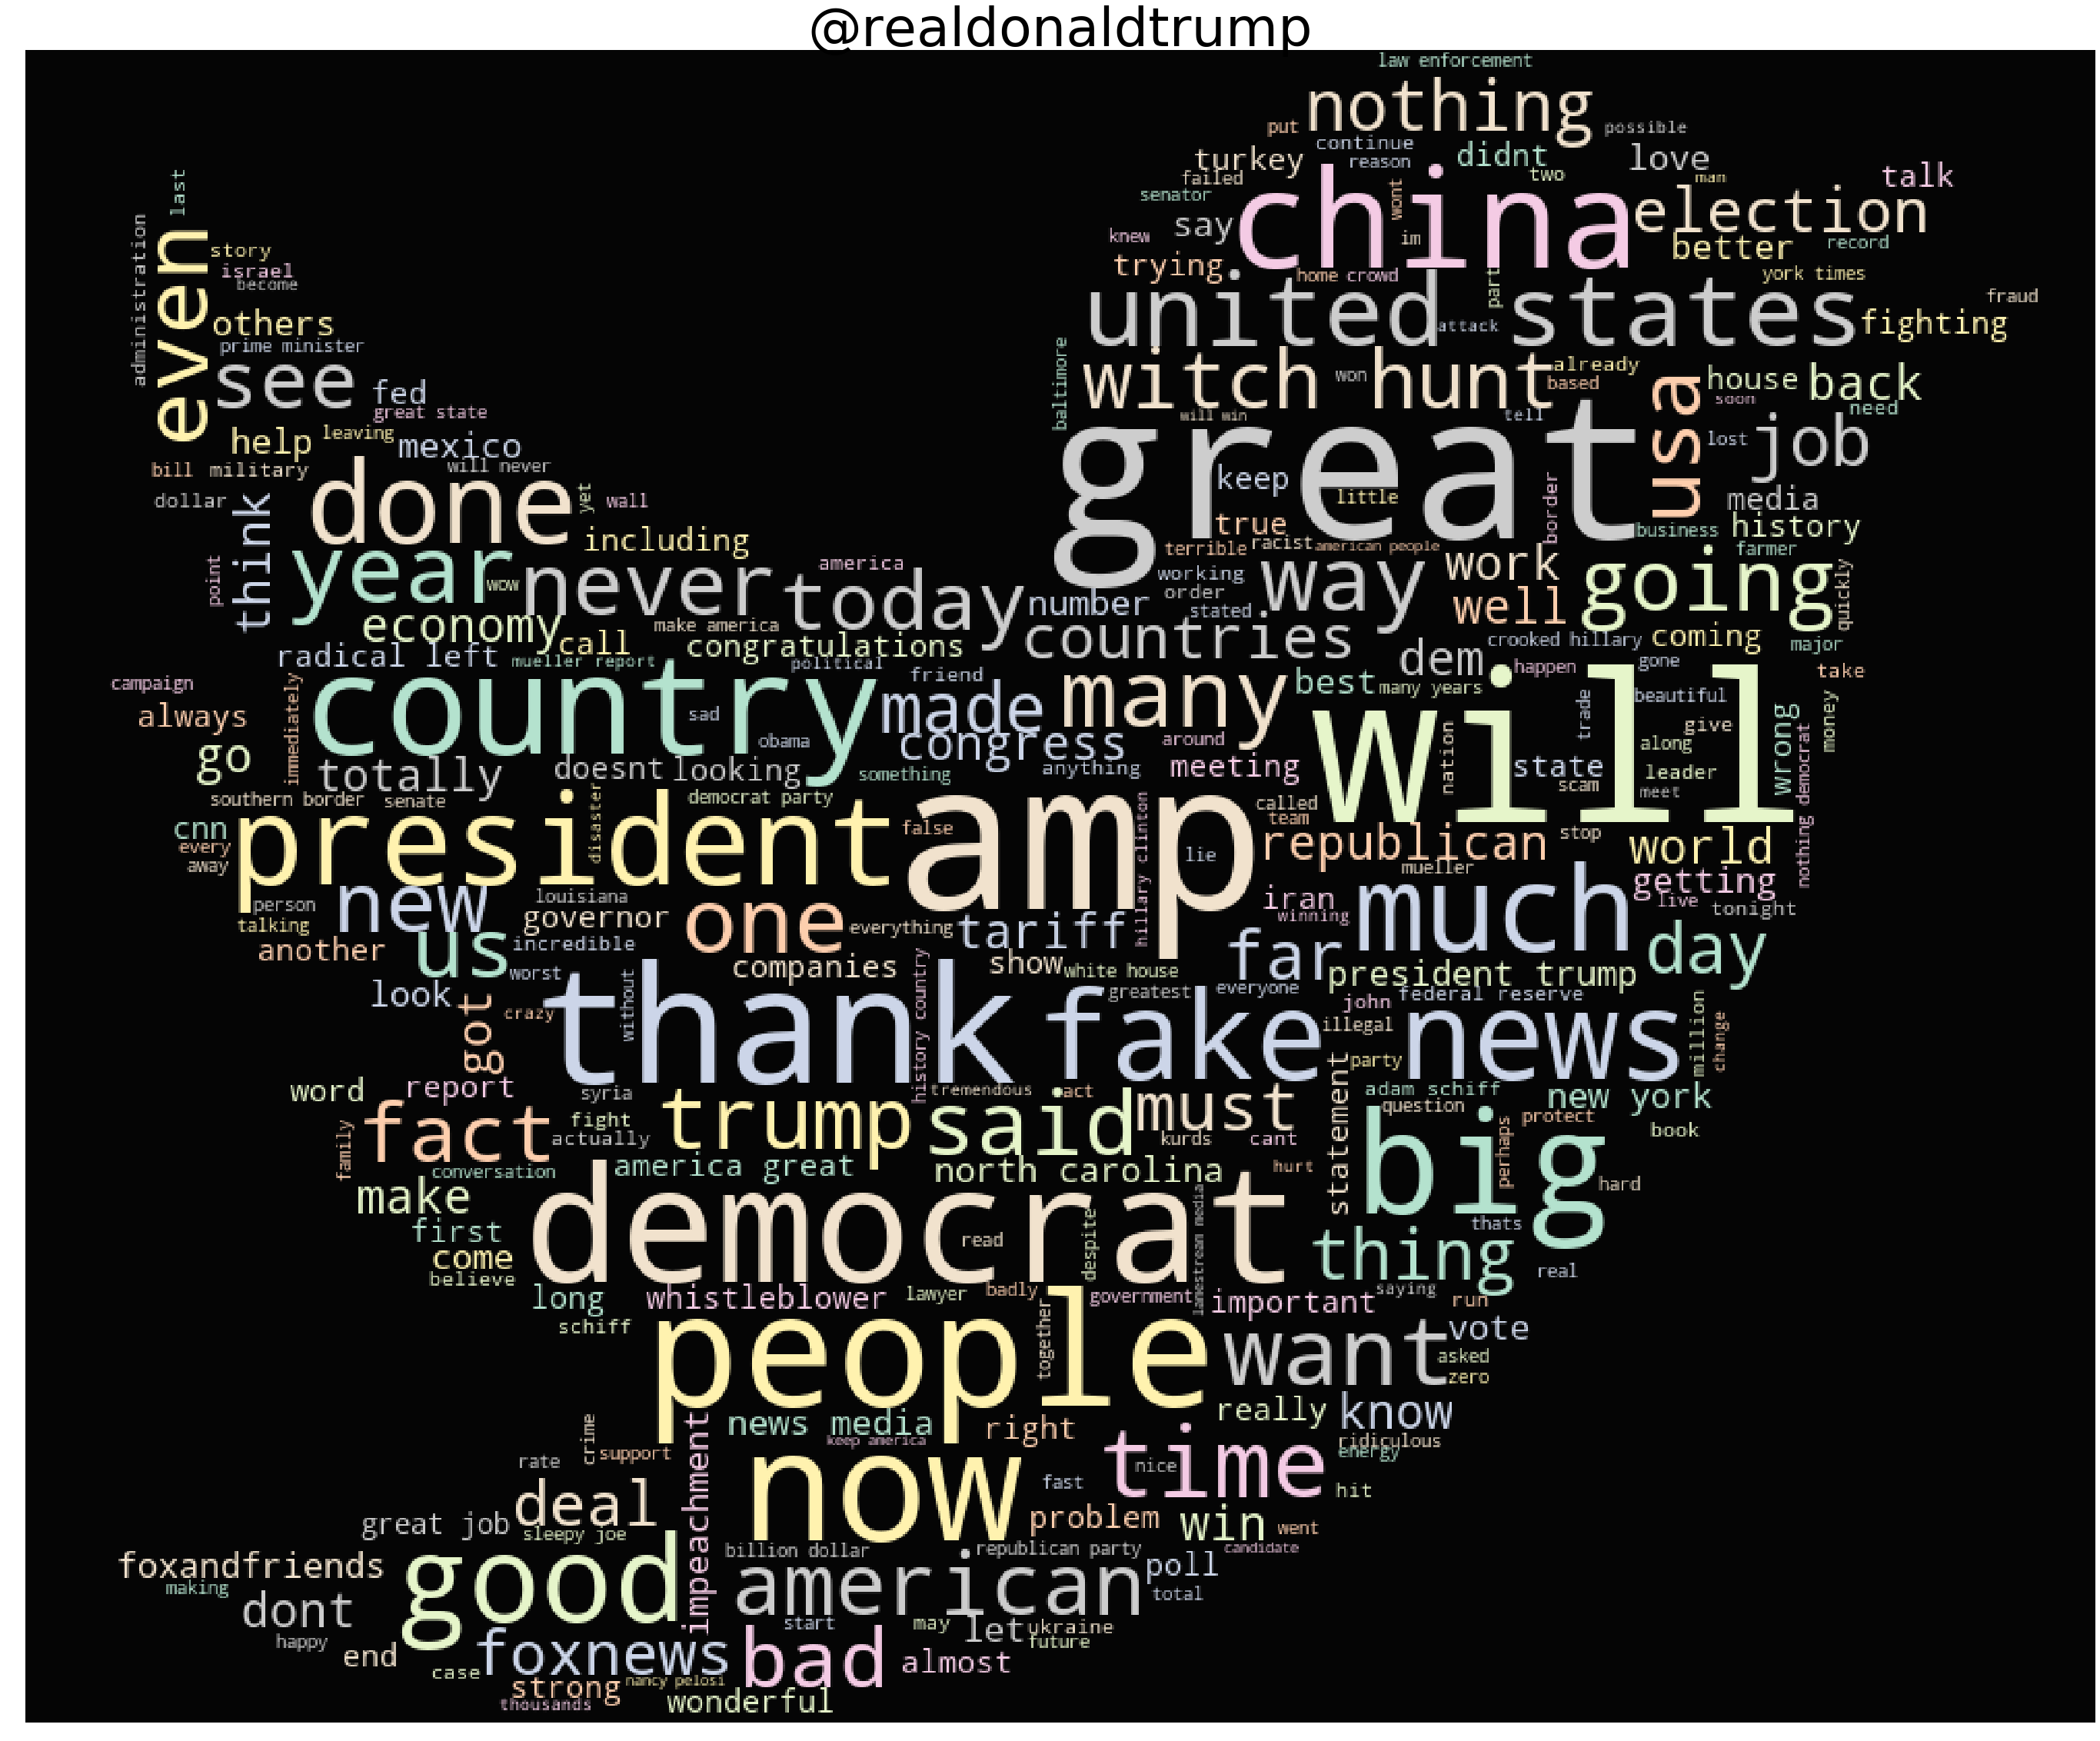

In [45]:
generate_tweet_wordcloud(tweet_text)

In [59]:
#return 5 most liked tweets
def get_most_liked_tweets(n,dataframe):
    most_liked_tweets = dataframe.nlargest(n,'favorite_count')
    return ["https://twitter.com/{}/status/{}".format(row.user['screen_name'],row.id) for index, row in most_liked_tweets.iterrows() ]

In [48]:
print(get_most_liked_tweets(5,df))

NameError: name 'get_most_liked_tweets' is not defined

In [61]:
#return 5 most liked tweets
def get_most_retweeted_tweets(n,dataframe):
    most_liked_tweets = dataframe.nlargest(n,'retweet_count')
    return ["https://twitter.com/{}/status/{}".format(row.user['screen_name'],row.id) for index, row in most_liked_tweets.iterrows() ]

In [62]:
print(get_most_retweeted_tweets(5,df))

['https://twitter.com/realDonaldTrump/status/1142157838153895941', 'https://twitter.com/realDonaldTrump/status/1130207891049332737', 'https://twitter.com/realDonaldTrump/status/1133531809118076929', 'https://twitter.com/realDonaldTrump/status/1141711064305983488', 'https://twitter.com/realDonaldTrump/status/1140302570394738688']


In [35]:
#Le agrego al CountVectorizer la lematización
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [58]:
tweet_text

'good news seems to be happening with respect to turkey syria and the middle east further reports to come later great job tim the democrats are trying to draw out this inquiry because they dont have the support donald trump is guilty only of winning the election mzhemingway foxandfriends cant believe that nervous nancy pelosi isnt moving faster on usmca her people want it they dont know why she isnt putting it up for a bipartisan vote taking too long approval rating in the republican party thank you thank you republicans out of present voted for us last night really good so some day if a democrat becomes president and the republicans win the house even by a tiny margin they can impeach the president without due process or fairness or any legal rights all republicans must remember what they are witnessing here a lynching but we will win kilmeade i want to know about hillary clinton with the dossier i want to know if there was fisa abuse were still waiting for that report ainsleyearhardt

In [62]:
df_text_list = [tweet for tweet in df_text_clean]

AttributeError: 'list' object has no attribute 'split'

In [63]:
df_text_list

['good news seems to be happening with respect to turkey syria and the middle east further reports to come later',
 'great job tim',
 'the democrats are trying to draw out this inquiry because they dont have the support donald trump is guilty only of winning the election mzhemingway foxandfriends',
 'cant believe that nervous nancy pelosi isnt moving faster on usmca her people want it they dont know why she isnt putting it up for a bipartisan vote taking too long',
 'approval rating in the republican party thank you',
 'thank you republicans out of present voted for us last night really good',
 'so some day if a democrat becomes president and the republicans win the house even by a tiny margin they can impeach the president without due process or fairness or any legal rights all republicans must remember what they are witnessing here a lynching but we will win',
 'kilmeade i want to know about hillary clinton with the dossier i want to know if there was fisa abuse were still waiting fo

# TOPIC MODELING

### Bag of Words

In [94]:
#Tomo 1000 muestras de las reviews conpuntaje 1 y lo mismo con las de puntaje 5
#Instancio el count vectorizer (Genera Bag of Words en base a los tweets) y le hago el fit
def bag_of_words_from_tweets(tweet_list):
    countvec_lda= LemmaCountVectorizer(max_df=0.95,min_df=5,stop_words="english",decode_error='ignore')
    bag_of_words = countvec_lda.fit_transform(tweet_list)
    return bag_of_words
tweet_bow = bag_of_words_from_tweets(df_text_list)
print(tweet_bow.shape)
print(tweet_bow.toarray())

(616, 347)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## LATENT DIRICHLET ALLOCATION

In [98]:
# Generating and training LDA model
from sklearn.decomposition import LatentDirichletAllocation
def lda_model(X):
    lda = LatentDirichletAllocation(n_components=3,
    learning_method = 'online',
    learning_offset = 50.,
    random_state = 0,
    n_jobs=-1)
    lda_Z= lda.fit_transform(X)
    return lda_Z
lda_Z = lda_model(tweet_bow)
print(lda_Z.shape,"\n")

(616, 3) 



In [99]:
# Printing each topic generated by the LDA model
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = countvec_lda.get_feature_names() # Me guardo los nombres de las features, es decir las palabras
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:great republican thank amp turkey china vote democrat job year big governor win louisiana fighting war kurd usa good deal border love party country state going military fight new people really syria isi just runoff today want night america edward

Topic #1:president trump hunt witch united state country history want greatest people look day just got big make pro work hard dont american donald new quid bad foxandfriends congratulation texas working quo statement year true turkey economy wonderful friend minneapolis happy

Topic #2:democrat president schiff whistleblower amp ukraine impeachment news adam fake said just ukrainian foxnews medium conversation time people trump like congress biden pelosi doing corrupt joe called country election scam good totally new wrong fraud dont phone crooked hunter transcript


In [86]:
from matplotlib import pyplot as plt

# Function that generates a wordcloud from the topic's words
def wordcloud_lda(topic_words):
    cloud = WordCloud( stopwords=STOPWORDS,
                background_color='black',
                width=3500,
                max_font_size=750,
                height=2400,).generate(" ".join(topic_words))
    plt.figure(figsize=[11,5.5])
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

In [87]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]

In [88]:
#utilizo los nombres de las features 
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]

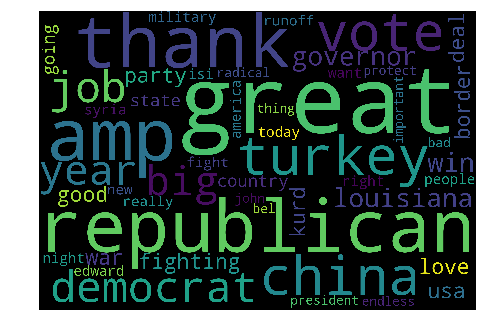

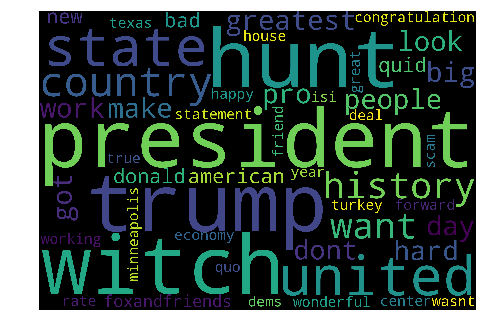

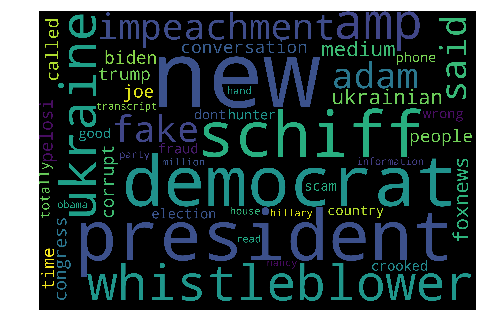

In [90]:
#Genero WordClouds
wordcloud_lda(first_topic_words)
wordcloud_lda(second_topic_words)
wordcloud_lda(third_topic_words)
